## Content

- **Overfitting-Underfit trade off**
    - Stochastic Gradient Boosting
    - Train time
    - Impact of outliers
    - Code walkthrough
    - Feature importance

- **XGBoost**
    - Hyperparams
    - Code walkthrough

# **Overfitting-Underfitting Trade-off**


#### How can we Regularize the GBDT model?




Let's see what are the hyperparams in GBDT 

#### 1. $M$ - The number of base learners

#### What will happen if M increases? 
As number of base learners increase, it is more likely that train error will go to 0. 

Hence, the model will overfit.

**As $M$ increases, the model will overfit**

<br>




<img src='https://drive.google.com/uc?id=1OehWNYBxUvBszDv8-VGFKaS4aefZbVZH' >


####2. The depth of base learners 

#### What will happen if depth increases?

As depth increases,model will overfit

**How?**

Let's say we have deep DT for base learners i.e. overfit models.

- In that case, Within 4 or 5 models, we'll crazily overfit to noise. 

Hence, we don't use deep DT as base learners





<img src='https://drive.google.com/uc?id=1xD61beXeLiAi_5i4dY7M6Gfx_LjHSwfP' >


With great power comes great risk 

The biggest risk of GBDT is 
- it can overfit easily if we are not careful

So, in order to avoid that, we introduce another level of regularization 



<img src='https://drive.google.com/uc?id=1CSNOZVJYp3NyRSjMTxeMj06Quve82fD9' >



#### 3. Shrinkage or Learning rate ($\nu$)


We add a regularization term $𝜈$
to the model $F_m(x)$ s.t. 
 * $F_m(x) = F_{m-1}(x) +\sum_{i=1}^m𝜈\ γ_mh_m(x)$ 



<br>

#### What will be the value of ν (nu)?
This 𝜈 always lies between 0 and 1

<br>

#### What is ν doing intuitively? 
Intuitively, ν is shrinking the impact of $m^{th}$ model so that models don't overfit easily

Think of it as an addition lever to control the overfit.

<br>

So, we can say that,

**as ν increases, chances of model overfitting increases**



Note: We have **same 𝜈 for all models in GBDT**



<img src='https://drive.google.com/uc?id=1zTQ_3nJ8nWZgUzCVTjJuAUoY_uQ-qY_N' >



#### Question: What should be done to $M$ if 𝜈 is decreased to keep the performance same?

Number of **base learners should be increased** because as we are decresing 𝜈, 
- we are restricting base learners contribution 
- due to which the error increases 


We use 𝜈 even when the $γ$ is there to avoid overfit, as there are high chances of overfitting

## **Question: Can we add a regulariser to (gamma weights) γ?**

Yes we can add regularisation to vector $γ$ whixh is 
$γ$=[$γ_1,γ_2,γ_3....γ_M$]



We can even add other terms controlling the number of leaf nodes which also becomes hyper parameter







<img src='https://drive.google.com/uc?id=1EtZi-SVT7_ARPEuI2cxJ1QNOAQl0GVYJ' >

# **Stochastic Gradient Boosting** 

#### What if we add randomization to GBDT ? 

This is what Stochastic Gradient boosting does.

The stochhastic gradient boosting follow the same framework as GBDT and

- **it also does row sampling and column sampling**

This **randomisation acts as regularisation** here.

Popular libraries such as Xgboost, LightGBM (discussed later) use this approach.




<img src='https://drive.google.com/uc?id=1b0t8tmqt6ksDPEK2Uqe-Q01IXUFPmSfC' >

## **Train time**

GBDT is the sequential model, Hence it is slow to train

#### How can we speed up GBDT?

* Row sampling and column sampling can speed up the model a little
* While building each base leraners we can apply **parallelisation**, i.e one sub-tree can be built on a core and the other sub-tree can be built on another core
* Even for bulding a single tree, **we have to calculate entropy of many features, this can be parallelised**





<img src='https://drive.google.com/uc?id=12V2N2vzcO9mBSj40dWX_xqv_5QezuJYK' >

# **Impact of outliers** 

#### Question: Will outliers impact GBDT?

Outliers can impact GBDT

- Each model is fit on the residual of the previous model
- Outliers will have higher residual values
- So, so gradient boosting will focus a large amount of its attention on reducing residual for these points.

#### Question: How to handle outliers?
1. Remove outliers
2. Specialized loss functions to handle outliers



Let us consider squared-loss which is $∑_{i=1}^n(y_i - ŷ_i)^2$

Here, if there is an outlier the error increases quadratically because of squaring
    






<img src='https://drive.google.com/uc?id=1eWKV9YbLFQYGQCuSR_FGHANPDw68L84D' >


##### What changes can we make in the loss function so that the model be robust to outliers?

* We can use **Root mean squared error**
* We can use absolute values of the error 





<img src='https://drive.google.com/uc?id=1QrUznldwhmGMthsMG-mmuz7L89zXS9FC' >

#### Question: abs function is not differentiable at 0; how to handle that?
   * As, already the error is 0, we simply use derivative of abs function @0 = 0 (computational hack)

Huber loss can also be used.
 * This function be quadratic in some areas and linear in some
   * As mentioned in the formuala, it uses the quadratic function in some range and liinear in the other range of values

<img src='https://drive.google.com/uc?id=1ryIZnNANcX_a2nQjeWvwibEaoQz1CMOn' >



<img src='https://drive.google.com/uc?id=1-fA_MyJbXQbwq1yBygn0109CljpZD0VZ' >





<img src='https://drive.google.com/uc?id=1menZJ9cL_62wkbz-zD8W4uFbFJY5GgRk' >



### Code walkthrough


Let's look at sklearn implementation for GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

start = dt.datetime.now()
model3 = GBC(n_estimators=150, learning_rate=0.2, max_depth=4, random_state=0, verbose = 1).fit(X_train, Y_train)
end = dt.datetime.now()

print(f"Time taken for training : {end - start}\nTraining accuracy:{model3.score(X_train, Y_train)}\nTest Accuracy: {model3.score(X_test, Y_test)}")

      Iter       Train Loss   Remaining Time 
         1           1.0121            3.63m
         2           0.7894            3.68m
         3           0.6437            3.67m
         4           0.5359            3.64m
         5           0.4574            3.64m
         6           0.3971            3.61m
         7           0.3476            3.59m
         8           0.3052            3.63m
         9           0.2735            4.03m
        10           0.2465            3.95m
        20           0.1315            3.46m
        30           0.0882            3.13m
        40           0.0632            2.84m
        50           0.0486            2.57m
        60           0.0380            2.33m
        70           0.0299            2.06m
        80           0.0238            1.80m
        90           0.0194            1.52m
       100           0.0156            1.25m
Time taken for training : 0:03:36.244311
Training accuracy:1.0
Test Accuracy: 0.9553639360892722


#### Plotting loss

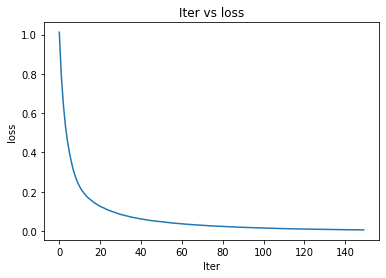

In [ ]:
plt.plot(model3.train_score_)

plt.xlabel('Iter')
plt.ylabel('loss')
plt.title('Iter vs loss')
plt.show()

# **Feature Importance**

#### How do we find feature importance in GBDT ? 

We simply find the feature importance of feature in each tree and 
- then take the average of these values to get over-all feature importance.



<img src='https://drive.google.com/uc?id=1NW-6jIIU55duZGJGzEIUk5P-8QZ3DZ-m' width = 600 >


#### Code walkthrough

In [ ]:
print(model3.feature_importances_)

plt.bar(range(len(model3.feature_importances_)), model3.feature_importances_)
plt.show()

Notice,
- It took around 4 min to train a single model
- Imagine how much time it'll take if we do hyperparam tuning on it.

Sklearn's implemenation of GBDT is not optimized and hence not preferred.

**So, what library do we use then?**

# **Xgboost**

XGBoost is one the popular library known for its well optimized code

For example : 

- if you have numerical feature $f_i$, 
    - instead of tryinig all the values for thresholding, 
    - it build a histogram of data and use simple rules like quartiles and percentiles to make thresholding.

- It also does multi core optimization (parallelization)
    - it'll compute each branch of a base learner on different core to speed up the process.

### **Xgboost hyperparams**

1. **Eta**: or the learning rate is the shrinking/regularization term which we studier earlier 

2. **min_split_loss** specify the minimum Information Gain which you want for further split. 

#### Question: What happens if min_split_loss increases?
If the min_split_loss value of the model is increased, 
- the splitting stops if the min_split_loss is not met. 
    
Due to this the depth decreases resulting in shallow tress.

Hence,results in the underfitting of the model.


3. **max_depth**, this parameter is used to set the depth of the base learners  




4. **min_child_weight**: you can increase the weight of the child due to which the splitting stops if the required threshold is not met

5. **subsample**. it's nothing but the row sampling 
 * There are many ways of sampling, same with column sampling

6. **Lambda**, it is the used apply the L2 regularization on the weights, which is $γ$ in our case 

7. **Tree_methods**, there are many ways to build a tree, we can specify the method basing on the conditions 




<img src='https://drive.google.com/uc?id=1tvyj1KYedvVhaeIJIAh_ZillGmf5p5rE' >



<img src='https://drive.google.com/uc?id=1k_JD_dg0las0-N03UWQ_jSzkIP1M-b9W' >



<img src='https://drive.google.com/uc?id=1Vvz_rxFrx0EAgwClXn8OFwkhZ_5eD9C0' >

#### What are most used hyperparams?

- Number of estimators (M)
- Depth
- ν : learning rate
- Col sampling/ row sampling 




<img src='https://drive.google.com/uc?id=1n0JuWHd8NerqKnYnWFQqIwKeNuJG7PUr' >

### Code walkthrough

In [ ]:

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        'learning_rate': [0.1, 0.5, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, silent=True)




In [ ]:
folds = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,Y_train), verbose=3, random_state=1001 )


start = dt.datetime.now()
random_search.fit(X_train, Y_train)
end = dt.datetime.now()


In [ ]:
print('\n Best hyperparameters:')
print(random_search.best_params_)

In [ ]:
best_xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, subsample=0.8, max_depth=5, learning_rate=0.5, colsample_bytree=1.0, silent=True)
best_xgb.fit(X_train, Y_train)

In [ ]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_xgb.score(X_train, Y_train)}\nTest Accuracy: {best_xgb.score(X_test, Y_test)}")

Since we are using randomized Search
- we made total of 30 fits 
    - total 10 combination of hyperparam
    - 3 fold cv for each combination

All these 30 fits took mere 5 mins to run compared to 4 mins for single fit of sklearn GBDT.

**Do you now see how fast it is compared to sklearn implementation?**

#### Feature importance

In [ ]:
print(best_xgb.feature_importances_)

plt.bar(range(len(best_xgb.feature_importances_)), best_xgb.feature_importances_)
plt.show()